## Numeric solutions of ODEs

Analytic solutions are very useful for a modeler because they allow prediction of the variable of interest at any time in the future. However, for many differential equations they are not easy to find, and for many others they simply cannot be written down in a symbolic form. Instead, one can use a numerical approach, which does not require an
exact formula for the solution. The idea is to start at a given initial value (e.g. $x(0)$) and use the derivative from the ODE (e.g. $dx/dt$) as the rate of change of the solution (e.g. $x(t)$) to calculate the
change or increment for the solution over a time step. Essentially, this means replacing the continuous change of the derivative with a discrete time step, thus converting the differential equation into a difference equation and then solving it. The solution of the difference equation is not the same as the solution of the ODE, so *numerical solutions* of ODEs are always approximate. I will use the notation $\hat x(t)$ to denote the numerical solution to distinguish it from the exact solution $x(t)$. The fundamental difference between them is that $\hat x(t)$ is not a formula that can be evaluated at any point in time, but instead is a sequence of numbers calculated every time step, which hopefully are close to the exact solution $x(t)$.

### Forward Euler method

Let us introduce all the players: first, we need to pick the time step $\Delta t$, which is the length of time between successive values of $\hat x$. In the difference equation notation one can use $\hat x_i$ to mean $\hat x(i\Delta t)$, the value of the numerical solution after $i$ time steps. Then we need to calculate the derivative, or the rate of change at a particular point in time. For any first-order ODE of the form

$$
\frac{d x} {dt} = \dot x = f(x,t)
$$ 

the rate of change depends (potentially) on the values of $x$ and $t$. This rate of change based on the numerical solution after $i$ time steps is $f(\hat x(i\Delta t), i\Delta t) = f(\hat x_i, t_i)$. Finally, to calculate the change of the dependent variable we need to multiply the rate of change by the time step. This should make sense in a practical context: if you drive for two hours (time step) at 60 miles per hour (rate of change), the total distance (increment) is $2*60=120$ miles. By the same token, we can write down how to calculate the next value of the numerical solution $y_{i+1}$ based on the previous one:

$$
\hat x_{i+1} = \hat x_i + \Delta t f(\hat x_i, t_i) 
 \label{eq:ch15_FE}
$$

This method of computing a numerical solution of an ODE is called the *Forward Euler method*, after the famous mathematician who first came up with it. It is called a forward method because it uses the value of the dependent variable and its derivative at time step $i$ to predict the value at the next time step $i+1$. The method is *iterative*, so it needs to be repeated in order to calculate a set of values of the approximate solution $y(t)$. Here are a couple of simple examples of computing numerical solution using FE:

**Example.** Let us numerically solve the ODE $\dot x = -0.1$ using the Forward Euler method. This means the defining function in the formulation of FE above is $f(x,t)=-0.1$. We can calculate the numeric solution for a couple of steps and compare the values with the exact solution, since we now know that it is $x(t) = x_0 -0.1t$. Let us pick the time step $\Delta t = 0.2$ and begin with the initial value $x(0)=1$. Here are the first three steps using the FE method:

$$
\begin{align}
\hat x(0.2) &=& \hat x(0) + \Delta t f(\hat x(0)) = 1 + 0.2 \times (-0.1) &=& 0.98 \\
\hat x(0.4) &=& \hat x(0.2) + \Delta t f(\hat x0.2)) = 0.98+ 0.2 \times (-0.1) &=& 0.96 \\
\hat x(0.6) &=& \hat x(0.4) + \Delta t f(\hat x(0.4)) = 0.96+ 0.2\times (-0.1) &=&0.94
\end{align}
$$

Since the rate of change in this ODE is constant, the solution declines by the same amount every time step. In this case, the numerical solution is actually exact, and perfectly matches the analytic solution. Table shows the numerical solution for 3 time steps along with the exact solution.

**Example.** Let us numerically solve the ODE $\dot x = -0.1x$ using the Forward Euler method. This means the defining function in the formulation of FE above is $f(x,t)=-0.1x$. We can calculate the numeric solution for a couple of steps and compare the values with the exact solution, since we now know that it is $x(t) = x_0 e^{-0.1t}$. Let us pick the time step $\Delta t = 0.2$ and begin with the initial value $x(0)=100$. Here are the first three steps using the FE method:

$$
\begin{align}
\hat x(0.2) &=& \hat x(0) + \Delta t f(\hat x(0)) = 100 + 0.2\times (-0.1*100) &=& 98 \\
\hat x(0.4) &=& \hat x(0.2) + \Delta t f(\hat x(0.2)) = 98+ 0.2\times (-0.1*98) &=& 96.04 \\
\hat x(0.6) &=& \hat x(0.4) + \Delta t f(\hat x(0.4)) = 96.04+ 0.2\times (-0.1*96.04) &=& \approx 94.12
\end{align}
$$


In this case, the derivative is not constant and the numerical solution is not exact. The error in the numerical solution grows with time, which may be problematic. We will further investigate how to implement the computation of numerical solutions using R in the next section.


### Error in numeric solutions

One of the main concerns of numerical analysis is to minimize the difference between the exact solution and the numerical solution, which is known as the *error*. There are at least two distinct sources of error in numerical solutions: a) *roundoff error* and b) *truncation error*. Roundoff error is caused by computers representing real numbers by a finite string of bits on a computer using what is known as a *floating point* representation. In many programming languages variables storing real numbers can be single or double precision, which typically
support 24 and 53 significant binary digits, respectively. Any arithmetic operation involving floating point numbers is only approximate, with an error that depends on the way the numbers are stored in the memory. Truncation error is caused by approximations inherent in numerical algorithms. The most common class of numerical approximations for ODEs is known as *finite difference* methods, and Forward Euler is a very simple representative of that class. As the name
suggests, these methods use difference equations to approximate a differential equation. There is inevitably a truncation error in such methods because they use a more or less clever scheme to approximate the instantaneous rate of change in an ODE, which can be thought as a truncation of the Taylor series after certain term.

A numerical modeler has different controls over the roundoff error and truncation error. The first can be minimized by using more memory to store the numbers, e.g. by using double precision format for the variables. Further, there are techniques for minimizing the so-called loss of significance that occurs in certain arithmetic operations, like
subtraction of two similar numbers. We will leave these considerations to numerical analysts [@press_numerical_2007]; for the most part, roundoff error is not a significant issue on modern computers. Truncation error, however, is much more within our control, because it depends on the choice of the numerical algorithm. One can decrease the error in the case of finite difference methods by choosing smaller time steps, or by choosing an algorithm with a higher *order of accuracy*.

Returning specifically to the Forward Euler method, it is called a *first-order method* because the total error of the solution (after some number of time steps) depends linearly on the time step $\Delta t$. One can show this by using the Taylor expansion of the solution $\hat x(t)$ to derive the forward Euler method, with $\tau(\Delta t)$ representing the
truncation error after one time step: 

$$
\hat x(t+\Delta t) = \hat x(t) +  \Delta t \frac{d\hat x(t)}{dt} + \tau(\Delta t)
$$

As you might have learned in calculus, the error remaining after the linear term in the Taylor series is proportional to the the square of the small deviation $\Delta t$. This only describes the error after 1 time step, but since the errors accumulate every time step, the total error after $n$ time steps accumulates $n \tau(\Delta t)$. As we saw in
the implementation above, for a given length of time, $n$ is inversely proportional to $\Delta t$. Therefore, the total error is proportional to the $\Delta t$ and so FE is a first-order method.

The exercise above shows that new errors in FE method accumulate in proportion with the time step. The next question is, what happens to these errors over time? Do they grow or dissipate with more iterations? This is known as the stability of a numerical method, and unlike the above question about the order of accuracy, the answer depends on the particular ODE that one needs to solve. Below I show an example of error analysis for a linear ODE:

```{topic} Error in the FE scheme
To numerically solve the equation $\dot x = ax$, we substitute the function $ax$ for the function $f(x,t)$, and obtain the FE approximation for this particular ODE:

$$
\hat x_{i+1} = \hat x_i + \Delta t a \hat x_i = (1+a\Delta t) \hat x_i
$$

The big question is what happens to the truncation error: does it grow or decay? To investigate this question, let us denote the error at time $t_i$ , that is the difference between the true solution $x(t_i)$ and the approximate
solution $\hat x(t_i)$, by $\epsilon_i$. It follows that $\hat x_i = x_i + \epsilon_i$. Then we can wrote the following difference equations involving the error:

$$
\hat x_{i+1} = x_{i+1} + \epsilon_{i+1} = (x_i + \epsilon_i) (1+a\Delta t)  = x_i (1+a\Delta t) + \epsilon_i(1+a\Delta t)
$$

Let us set aside the terms in the equation that involve $x$ (since it is just the equation for forward Euler). The remaining difference equation for $\epsilon$ describes the change in the error:

$$
\epsilon_{i+1} = \epsilon_i(1+a\Delta t)
$$

This states that the error in this numerical solution is repeatedly multiplied by the constant $(1+a\Delta t)$. As we saw in section \[sec:math14\], this linear difference equation has an exponential solution $\epsilon_n = (1+a\Delta t)^n \epsilon_0$, which decays to 0 if $|1+a\Delta t| < 1$ or grows without bound if $|1+a\Delta t| > 1$. The
first inequality is called the stability condition for the FE scheme, since it guarantees that the old errors decay over time. Since $\Delta t >0$, the only way that the left hand side can be less than 1 is if $a<0$. Therefore, the condition for stability of the FE method for a linear ODE: 
$$
|1 + a\Delta t| < 1 \Rightarrow \Delta t < -2/a
$$

Thus, if $a>0$, the errors will eventually overwhelm the solution. If $a<0$, if the time step is small enough (less than $-2/a$) then FE is stable. 
```
Generally speaking, however, Forward Euler is about the worst method to use for practical numerical solutions of ODEs, due to its low accuracy and to its lack of stability under certain conditions.

### Backward Euler method

More sophisticated numerical methods generally offer better stability than Forward Euler. For instance, there is a class of methods called *implicit* schemes which rely on evaluating the value of the derivative of $x$ at a future time point. This may seem impossible, since we do not yet have the value of the dependent variable $x$ in the future, only in the present. In fact, we can set up an algebraic relationship between the present value of $x$, the future value of $x$, and the derivative of $x$ in the future. Then, depending on the form of the defining function $f(x)$, we may solve this relationship for the value of $x$ at the future time.

To make the idea of implicit methods concrete, we will introduce a simple method called the Backward Euler. As suggested by the name, this method is essentially similar to the Forward Euler, but with the future value of $x_{i+1}$ substituted in the defining function instead of the current value:

$$
\hat x_{i+1} = \hat x_i + \Delta t \frac {d\hat x_{i+1}}{dt} = \hat x_i + \Delta t f(\hat x_{i+1})
$$

How can we calculate the value of $f(\hat x_{i+1})$ if you don’t know $\hat x_{i+1}$? Depending on the form of $f(x)$, it may be possible to algebraically solve for $\hat x_{i+1}$. If we can solve the implicit expression for $y_{i+1}$, we can program a numerical scheme that will compute the value $\hat x_{i+1}$ directly from $\hat x_i$. In other situations, the implicit expression may be impossible to solve algebraically. The practitioner may then use a method for solving such an expression numerically, using a numerical root-finding algorithm such as Newton’s method that we will see later in this course.


```{topic} Error in the BE scheme
Here is the implementation of the Backward Euler for the linear ODE $\dot x = a x$: 

$$
\hat x_{i+1} = \hat x_i + \Delta t a \hat x_{i+1}
$$ 

For this particular ODE, the implicit equation can be solved for the future value $\hat x_{i+1}$:

$$
(1- a\Delta t) \hat x_{i+1} = \hat x_i \Longrightarrow \hat x_{i+1} = \frac{1}{1- a\Delta t} \hat x_i
$$

Now we use the same stability analysis as we did for Forward Euler: assume the numerical solution $\hat x_i$ has total error $\epsilon_i$, and substitute $\hat x_i = x_i + \epsilon_i$:

$$
\hat x_{i+1} = x_{i+1} + \epsilon_{i+1} = \frac{1}{1- a\Delta t}  (x_i  + \epsilon_i) =  \frac{1}{1- a\Delta t} x_i + \epsilon_i \frac{1}{1- a\Delta t}
$$

Again, let us comapare the numeric solution $\hat x$ with the excact solution $x$ and investigate the behavior of the error, which is given by the difference equation:

$$
\epsilon_{i+1} = \frac{1}{1- a\Delta t}   \epsilon_i
$$ 

The error decays with time if the multiplicative constant $1/(1- a\Delta t)$ is less than 1 in absolute value, which can be written as $|1- a\Delta t| >1 $. We need to consider two cases: positive $a$ and negative $a$:

* If $a > 0$, then $|1- a\Delta t|$ is greater than 1 provided that $\Delta t > 1/|a|$, so the Backward Euler scheme for the exponential growth ODE is stable when $\Delta t$ is greater than a certain threshold. This appears counterintuitive, so it is worth investigating in the lab.

* If $a < 0$, then $|1- a\Delta t|$ is greater than 1 for any value of $\Delta t$, so it is *unconditionally stable*. This is also worth investigating with numerical experimentation.
```

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

## Implementation in Python

### Forward Euler
We defined the Forward Euler method in the section above, and now we will implement is as a computational algorithm. Like any algorithm, one needs to be clear about its inputs and outputs. In this case, the inputs are the defining function $f(x,t)$, the initial value, the time step, and the total time. The output is the solution vector $y$, which contains a sequence of values that approximate the solution of the ODE, along with the vector of time values spaced by the time step. Notice that it is very similar to the script for numerical solution of a difference equation we saw in chapter 1 with the major difference being the presence of a time step, whereas in difference equations the time step is aways 1. There is one more important point for the implementation: usually one needs to solve the ODE for a particular length of time $T$ with a specified time step $\Delta t$ . This dictates that the required number of iterations be $T/\Delta t$; in other words, for a given time period the number of time steps is inversely proportional to the time step. 


```{admonition} Outline (pseudocode) for the Forward Euler algorithm
:class: tip 
 * Specify the defining function for the ODE $f(x)$
 * Set the time step $dt$ and the total length of time $T$
 * Calculate the number of steps $n \gets T/dt$
 * Initialize the time array $t$ with $n + 1$ elements
 * Initialize the solution array $x$ with $n + 1$ elements and initial value $x_0$
 * Use a for loop to compute the next $x(i+1)$ based on the current $x(i)$ for $n$ steps
```

Below we implement the Forward Euler method to solve the linear ODE

$$
dx/dt = r*x
$$


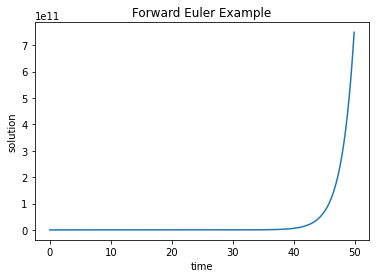

In [2]:
#Implementation of Forward Euler method to solve dx/dt = r*x

dt = 0.1 #set the time step
T = 50 #set the time duration
Niter = int(np.ceil(T/dt)) #determine the number of iterations
P = np.zeros(Niter) #preallocate the solution array
P[0] = 20 #set the initial value
t = np.arange(0,T,dt) #preallocate the time array
r = 0.5 #set the growth rate

#Do the Euler!
for i in np.arange(Niter-1):
    P[i+1] = P[i] + dt*r*P[i] #this is the FE step

plt.plot(t,P)
plt.xlabel('time')  
plt.ylabel('solution') 
plt.title('Forward Euler Example') 
plt.show()

The plot should look like an exponential curve, which seems reasonable, but how accurate is it? Remember from the reading that we can define the error of FE at each point, $t$, as $|x(t)- \hat x(t)|=\epsilon(t)$. Also, we can define the algorithm as stable if the error at some point, $t$, does not grow so that $\left|x(t+1)- \hat x(t+1)\right| \leq \epsilon(t)$, where $x(t)$ is the exact solution.

### Backward Euler

Now we'll turn to the second method introduced above, Backward Euler (BE). This time, instead of evaluating $f(x,t)$ at the present time for finding the future point, we use the future point itself! In order to do this, we set up an
algebraic relationship between the present value, the future value, and the derivative of the future value such that

$$
\hat x(t+\Delta t) = \hat x(t) + dt*f(\hat x(t+\Delta t)) + \epsilon(t)
$$

Then, we must solve for $\hat x(t+\Delta t)$. Sometimes this will be impossible to do algebraically, but it may be possible to solve the equation numerically. Once we solve for $x(t+1)$, the steps for implementing the algorithm are
similar to the ones for Forward Euler:

```{admonition} Outline (pseudocode) for the Backward Euler algorithm
:class: tip 
 * Specify the defining function for the ODE $f(x)$
 * Set the time step $dt$ and the total length of time $T$
 * Calculate the number of steps $n \gets T/dt$
 * Initialize the time array $t$ with $n + 1$ elements
 * Initialize the solution array $x$ with $n + 1$ elements and initial value $x_0$
 * Use a for loop to compute the next $x(i+1)$ based on the current $x(i)$ for $n$ steps
```
Below is an

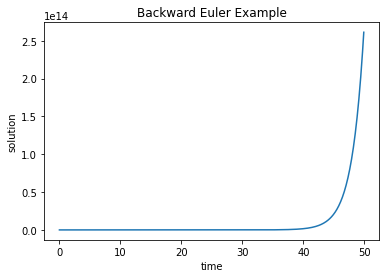

In [3]:
#Implementation of Backward Euler method to solve dx/dt = r*x

dt = 0.1 #set the time step
T = 50 #set the time duration
Niter = int(np.ceil(T/dt)) #determine the number of iterations
x = np.zeros(Niter) #preallocate the solution array
x[0] = 2000 #set the initial value
t = np.zeros(Niter) #preallocate the time array
r = 0.5 #set the growth rate

#Do the Euler!
for i in range(Niter-1):
    x[i+1] = x[i]/(1-r*dt) #this is the BE step
    t[i+1] = t[i] + dt #add the current time to the time vector

plt.plot(t,x)
plt.xlabel('time')  
plt.ylabel('solution') 
plt.title('Backward Euler Example') 
plt.show() 